In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [3]:
wine_red_df = pd.read_csv("data/winequality-red.csv", sep = ";")

In [4]:
wine_red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
wine_red_df["quality"].tail(10)

1589    5
1590    6
1591    6
1592    6
1593    6
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, dtype: int64

In [6]:
wine_red_df.shape

(1599, 12)

In [7]:
wine_red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
wine_red_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
wine_red_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Visualization

In [10]:
cols = wine_red_df.columns[wine_red_df.dtypes != 'object'].to_list()

In [11]:
cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [12]:
len(cols)

12

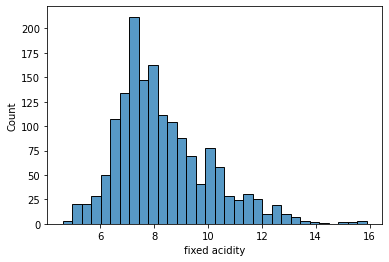

In [13]:
sns.histplot(data = wine_red_df, x = "fixed acidity")
plt.show()

<Figure size 1440x720 with 0 Axes>

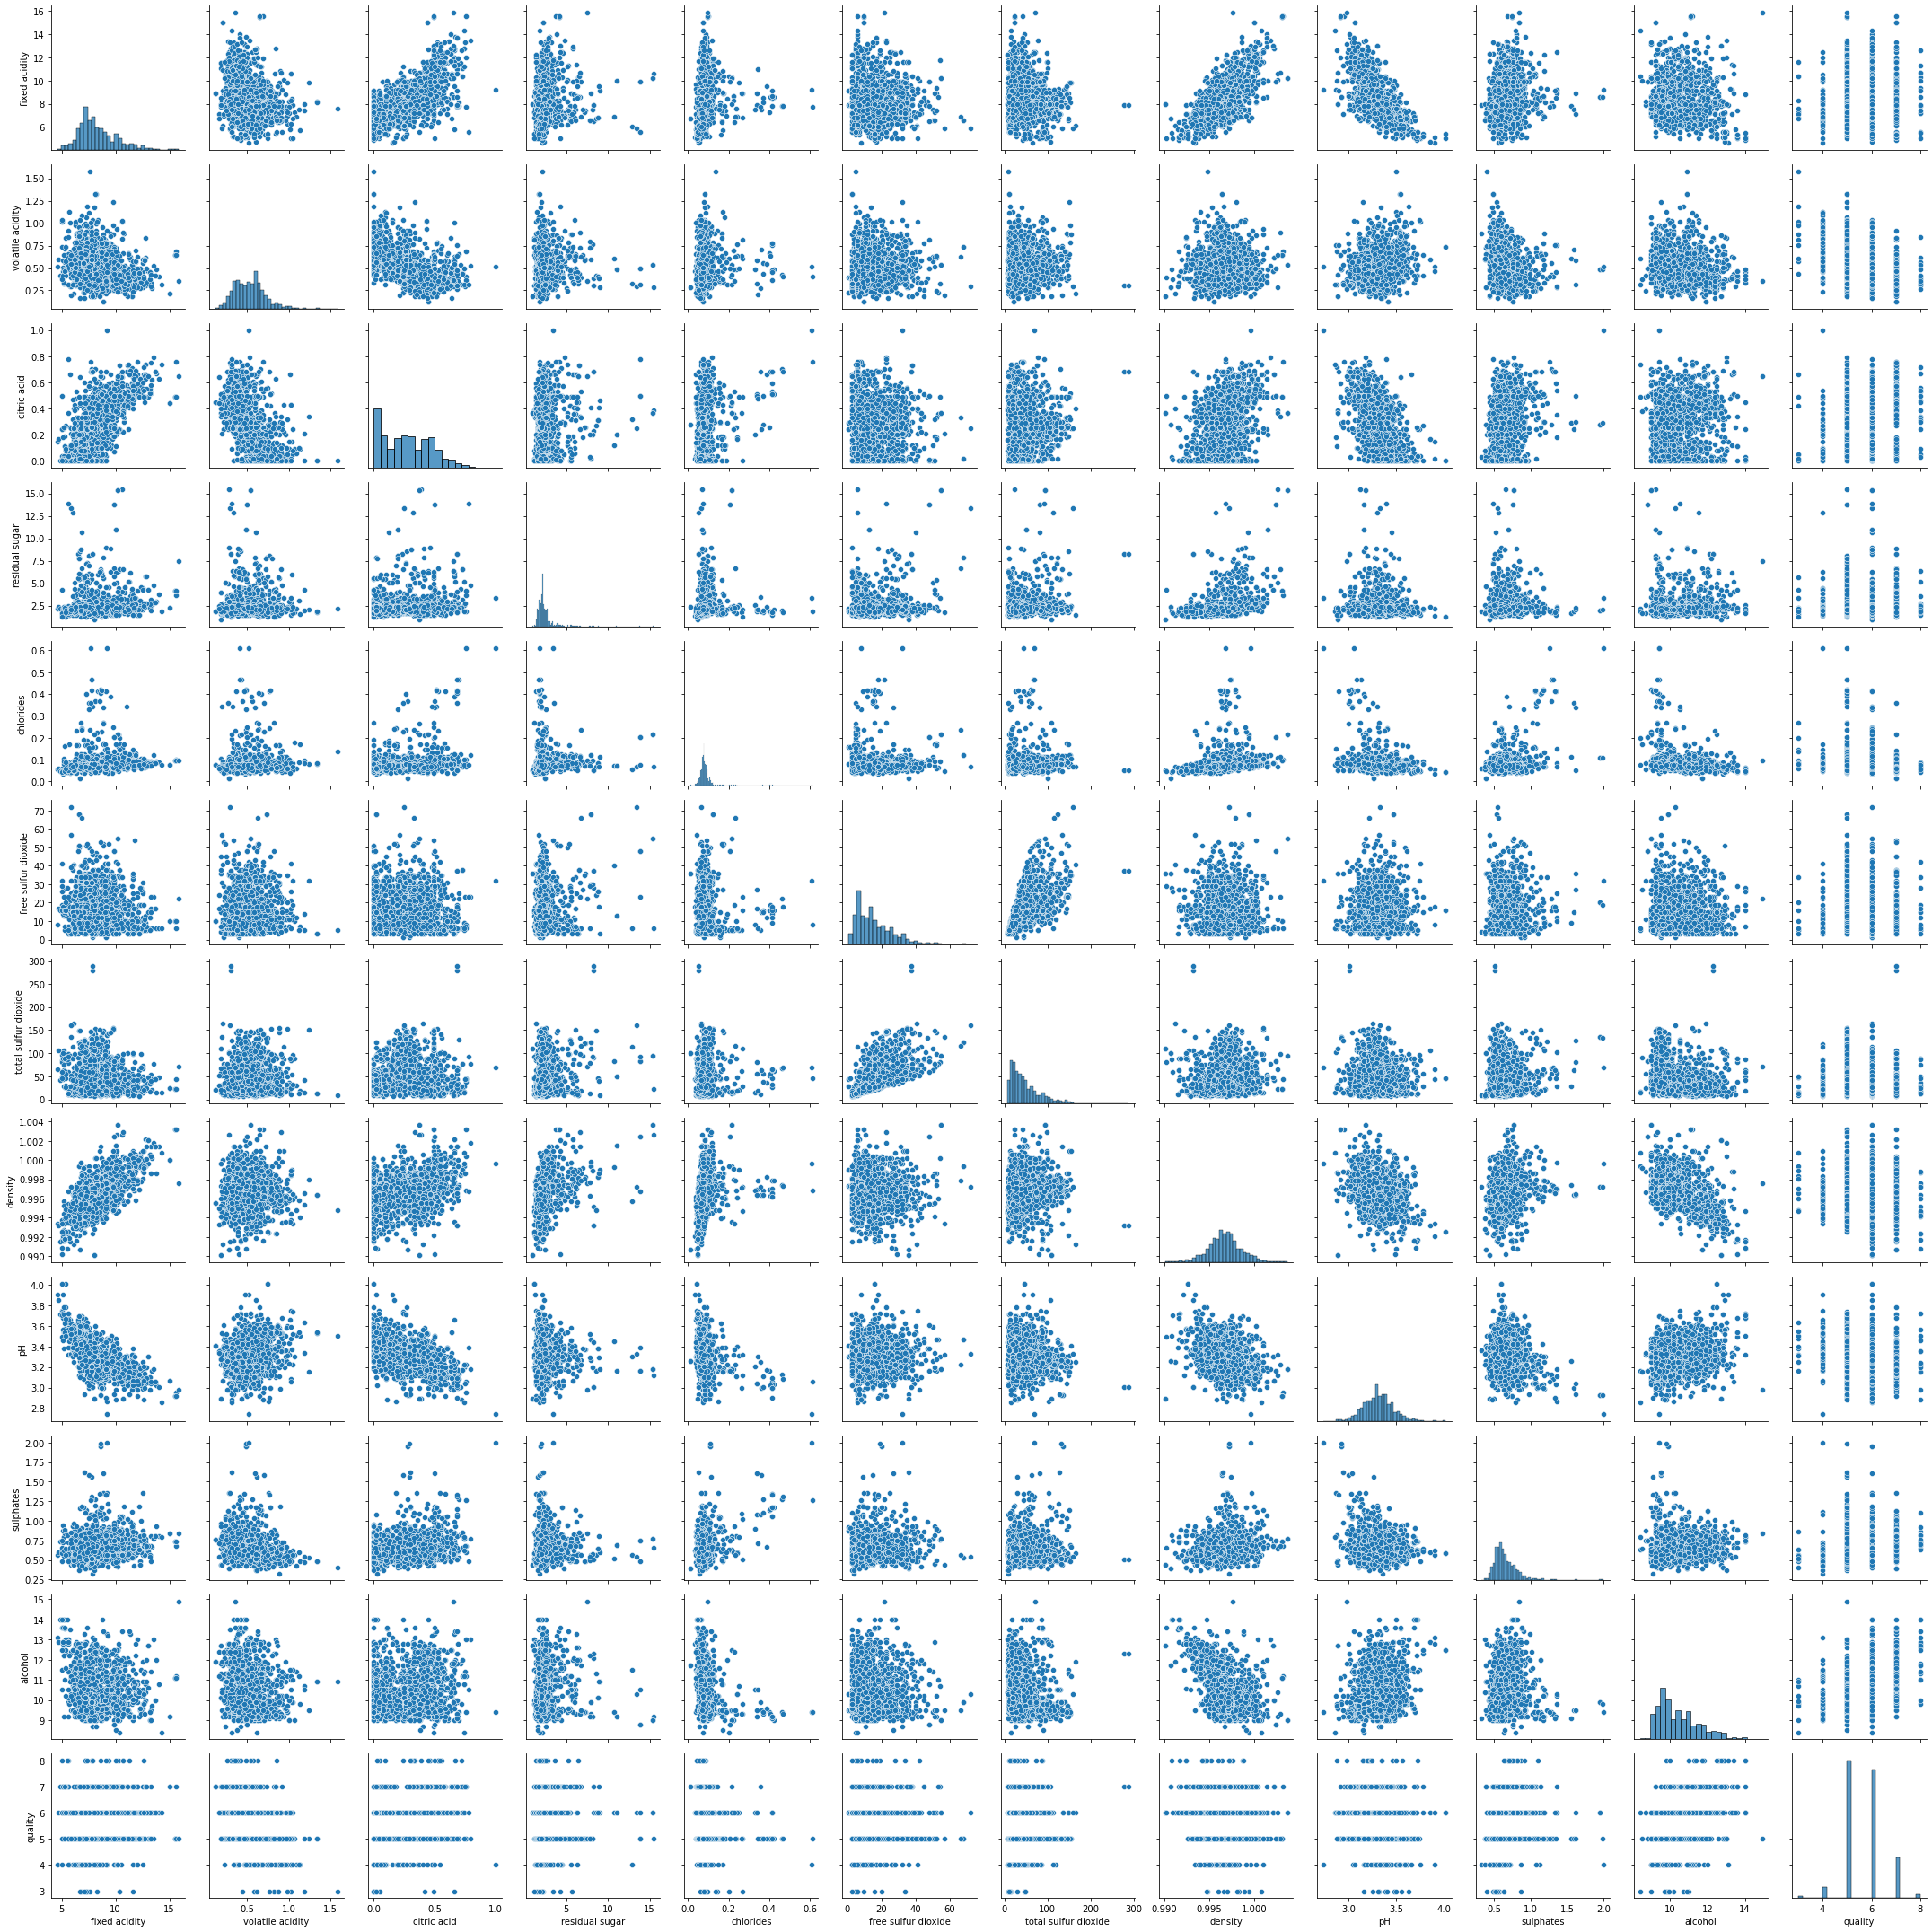

In [14]:
plt.figure(figsize=(20, 10))
sns.pairplot(wine_red_df[cols])
plt.tight_layout()
plt.show()

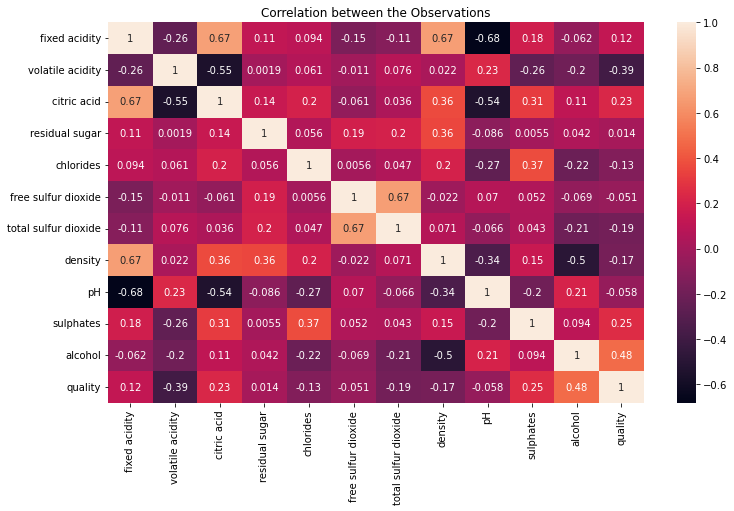

In [15]:
plt.figure(figsize=(12,7))
sns.heatmap(wine_red_df.corr(), annot=True)
plt.title("Correlation between the Observations")
plt.show()

### I wound need to scale my variables but I need to drop the class "quality" 

In [16]:
wine_red_X = wine_red_df.drop("quality", axis=1)

In [17]:
wine_red_X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### Scaling my dataset so that the mean becomes 0 and std becomes 1

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine_red_X)

In [24]:
print(X_scaled)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


### Dimemsionality Reduction

In [25]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_

array([0.28173931, 0.1750827 , 0.1409585 ])

In [26]:
sum(pca.explained_variance_ratio_)

0.5977805108224632

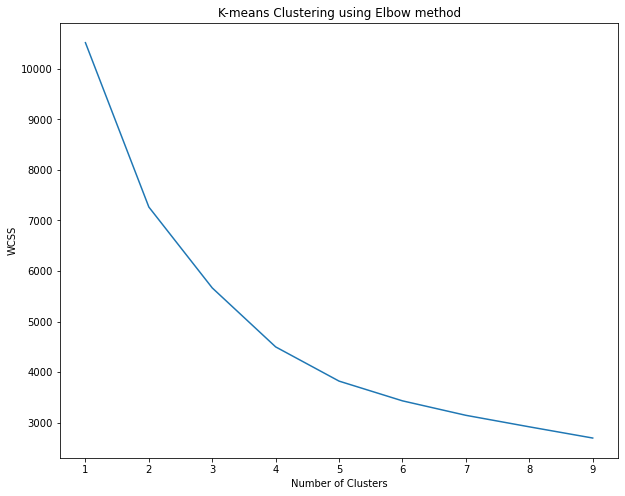

In [27]:
# To get calculate the sum of square using the optimal clusters using the Elbow method
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_reduced)
    wcss.append(kmeans.inertia_) # the inertia use sum of square
    
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot I can choose the number of clusters. 
plt.figure(figsize = (10,8))
plt.plot(range(1, 10), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering using Elbow method')
plt.show()

In [28]:
## From the Elbow method, the number of cluster is 3 then I implement the KMeans algorithm to train my model
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X_reduced)

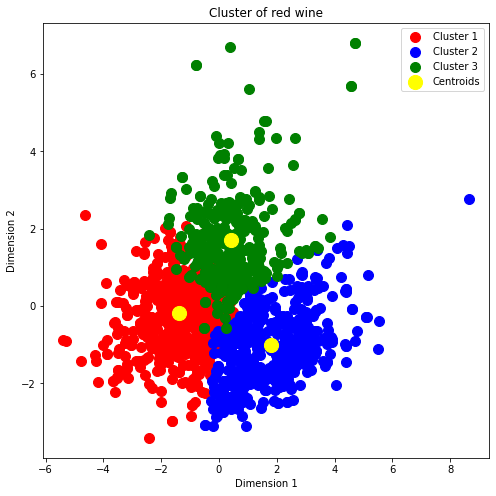

In [29]:
## This is the implemtation of KMeans to cluster my data looping through
colours = ["red", "blue", "green"]
plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(X_reduced[y_kmeans == i, 0], X_reduced[y_kmeans == i, 1],s=100, c=colours[i], label = "Cluster "+str(i+1))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = "yellow", label = "Centroids")
plt.title("Cluster of red wine")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

### Using Heirachical clustering

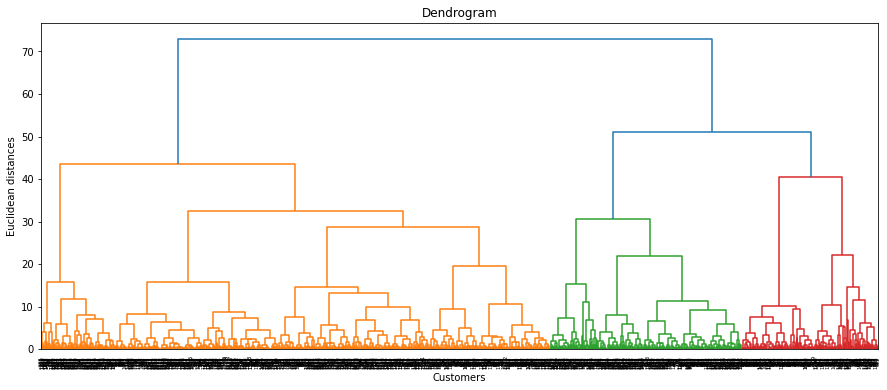

In [30]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (15, 6))
dendrogram = sch.dendrogram(sch.linkage(X_reduced, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [31]:
hei = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage="ward")
heira_cluster = hei.fit_predict(X_reduced)

In [32]:
np.unique(heira_cluster, return_counts=True) # Return the unique values

(array([0, 1, 2], dtype=int64), array([973, 259, 367], dtype=int64))

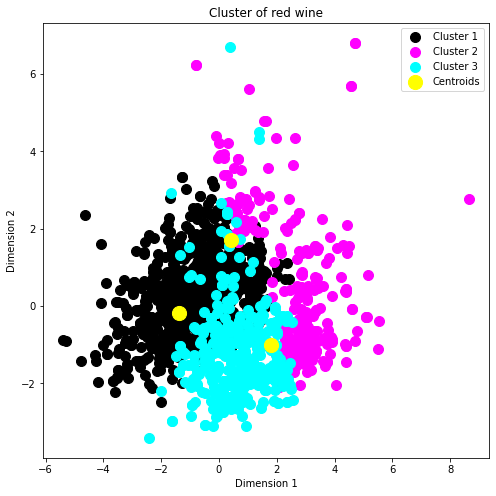

In [33]:
colours = ["black", "magenta", "cyan",]
plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(X_reduced[heira_cluster == i, 0], X_reduced[heira_cluster == i, 1],s=100, c=colours[i], label = "Cluster "+str(i+1))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = "yellow", label = "Centroids")
plt.title("Cluster of red wine")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

In [60]:
# for accuracy validation and evaluation using Silihoutte score

In [34]:
sil_KMeans = metrics.silhouette_score(X_reduced, y_kmeans)
sil_hei = metrics.silhouette_score(X_reduced, heira_cluster)
print(f"silihouete score:\n ====")
print(f"Kmeans:{sil_KMeans}")
print(f"Heirachical:{sil_hei}")

silihouete score:
 ====
Kmeans:0.3049556214818774
Heirachical:0.27285414993021395
